In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
plt.rcParams['figure.figsize'] = (4,3)

In [3]:
data = sns.load_dataset('penguins')

___

# Ticks, labels, spines

### Where are different objects (axis, ticks, tick locations, tick labels) located 

Let's draw our figure again

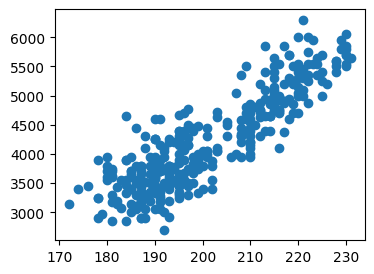

In [4]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);

There are various ways to access slightly different xtick-related objects: 

Call the methods of the `axes` object: 

In [5]:
print(ax.get_xticks())
print(ax.get_xticklabels())
print(ax.get_xticklabels()[0])
print(ax.get_xticklabels()[0].get_text())
print(ax.get_xticklabels()[0].get_position())

[160. 170. 180. 190. 200. 210. 220. 230. 240.]
[Text(160.0, 0, '160'), Text(170.0, 0, '170'), Text(180.0, 0, '180'), Text(190.0, 0, '190'), Text(200.0, 0, '200'), Text(210.0, 0, '210'), Text(220.0, 0, '220'), Text(230.0, 0, '230'), Text(240.0, 0, '240')]
Text(160.0, 0, '160')
160
(160.0, 0)


Access the `xaxis` and `yaxis` directly: 

In [6]:
print(ax.xaxis.get_major_ticks())
print(ax.xaxis.get_major_ticks()[0].get_loc())
print(ax.xaxis.get_major_ticks()[0].label1)

[<matplotlib.axis.XTick object at 0x000001F4276211D0>, <matplotlib.axis.XTick object at 0x000001F427616ED0>, <matplotlib.axis.XTick object at 0x000001F427617790>, <matplotlib.axis.XTick object at 0x000001F42799AB50>, <matplotlib.axis.XTick object at 0x000001F4279A0E50>, <matplotlib.axis.XTick object at 0x000001F4279A3150>, <matplotlib.axis.XTick object at 0x000001F4279A54D0>, <matplotlib.axis.XTick object at 0x000001F4279A1850>, <matplotlib.axis.XTick object at 0x000001F4279B4450>]
160.0
Text(160.0, 0, '160')


Here I am using the `ax` object I created in the cell above - it also lives outside of the cell as a variable and contains the elements of the plot 

There are more such elements, which are "children" of the `ax` object: 

In [7]:
ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

We will use many of these for customization later on. 

## Customizing tick positions and tick labels

#### Modifying ticks by hand: 

We can feed the `ax.set_xticks`/`ax.set_yticks` function with a pre-calculated list of ticks. We can do it completely separately for major and minor ticks. If we want to adapt tick labels, we can also do it by hand 

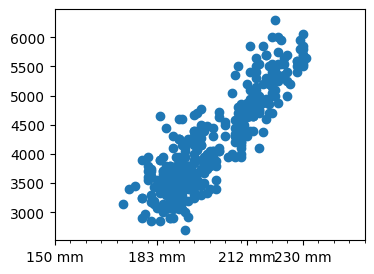

In [8]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);


## set tick positions 

new_xticks = [150, 183, 212, 230] # custom ticks
ax.set_xticks(new_xticks, minor=False);

new_xticks_minor = np.arange(150,251,5) # range of ticks generated using numpy 
ax.set_xticks(new_xticks_minor, minor=True);
## major and minor ticks are independent of each other! 


## modify the labels e.g. to add a unit 

## in Jupyter this doesn't work: 
# old_xticklabels = ax.get_xticklabels()
# new_xticklabels = [t.get_text()+' mm' for t in old_xticklabels]

new_xticklabels = [str(t)+' mm' for t in new_xticks] 
ax.set_xticklabels(new_xticklabels);

# only for demo purpose - normally you want to indicate the unit outside of the ticks, close by the xlabel, e.g. "length [mm]"
# useful when plotting in radians in multiples of pi 

#### Modyfing ticks programmatically: Using the `Locator` and `Formatter`:

MPL has a separate logic to find out the tick positions. It is better than defining ticks by hand, because for example you can say how many ticks per axis you want, or what is the multiplier etc. and you don't have to worry about the data range or the figure size. 

Those functions live in `matplotlib.ticker`, which is parallel to `matplotlib.pyplot`, so we have to import them separately. 

We add them to the `ax.xaxis` and `ax.yaxis` objects, not to the ticks themselves 

There are a couple of useful pre-defined Locators and Formatters, but we can also define our own. There is a recipe how to do that

https://matplotlib.org/stable/api/ticker_api.html#tick-locating-and-formatting \
https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html

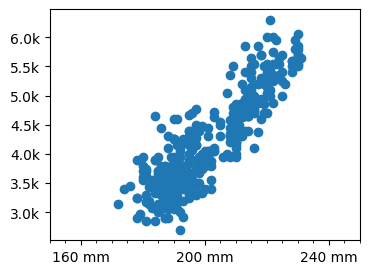

In [9]:
from matplotlib.ticker import MultipleLocator, EngFormatter

# create the chart 
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);

# optional: for the sake of exercise, let's extend the xaxis to show more ticks 
ax.set_xlim(150,250)


## LOCATORS 

# set x-tick locations 
ax.xaxis.set_major_locator(MultipleLocator(40)) # major tick each 40 units 
ax.xaxis.set_minor_locator(MultipleLocator(5)) # minor tick each 5 units 



## FORMATTERS 

# y-axis: format thousands in the engineering notation 
ax.yaxis.set_major_formatter(EngFormatter(sep='', places=1))

# x-axis: define a custom x-tick label formatting: we want a unit behind each tick 
# the formatter function must take 2 arguments and return a string 
# one of them is a dummy argument and we will set it to None 

# step 1: what should the formatter do with a single tick value 
def format_tick_unit(unit, x, pos=None):
    out = str(round(x))+' '+unit
    return out

# step 2: create a formatter function to plug it into the xaxis 
format_mm = lambda x, pos: format_tick_unit('mm', x, pos)
ax.xaxis.set_major_formatter(format_mm)

## Customizing how ticks look and where they are

### moving ticks around (top/bottom/left/right) and customizing their looks

By default, the ticks are drawn on the bottom and left axis: 

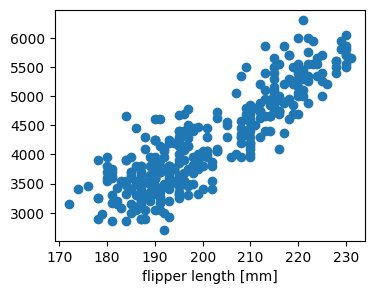

In [10]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);
ax.set_xlabel('flipper length [mm]');

We can change it in a couple of ways:  

- `ax.{x,y}axis.set_ticks_position(...)`
- `ax.xaxis.tick_top()`
- `ax.tick_params(...)`

Ticks get moved separately from the xaxis label, and ticks and tick labels can also be switched on and off separately 

#### modify `ax.xaxis`

Text(0.5, 0, 'flipper length [mm]')

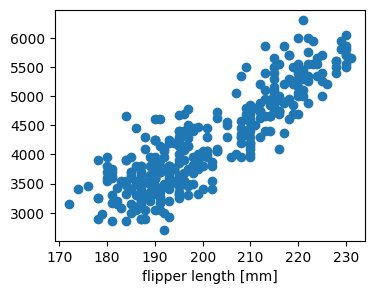

In [11]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);
ax.set_xlabel('flipper length [mm]')

## uncomment and comment out the following lines to see what changes: 

# ax.xaxis.set_ticks_position('top')  # switch bottom off, top on, moves only the ticks
# ax.xaxis.tick_top() # does the same 
# ax.xaxis.set_label_position('top') # moves only the label

#### `ax.tick_params`

`ax.tick_params` has a bit special API: you can either apply things to a particular subset of ticks, or to all ticks at once

``` 
ax.tick_params(axis='x', which='major', ...) # customizing appearance of major xticks only
ax.tick_params(bottom=False, labelbottom=False... ) # customizing appearance of ticks across spines 
```


You can use it many times in a single chart 

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tick_params.html

Text(0.5, 0, 'flipper length [mm]')

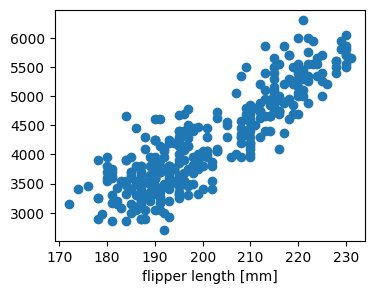

In [12]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);
ax.set_xlabel('flipper length [mm]')

## uncomment one or more lines and experiment: 

# ax.tick_params(axis='x', which='major', right=True) # no effect, because I specified the axis and xaxis has no right/left ticks
# ax.tick_params(right=True) # this works and automatically applies the command to the y axis

# ax.tick_params(top=True, bottom=True) # only the ticks 
# ax.tick_params(labeltop=True, labelbottom=True) # only the labels

### making ticks and tick labels colorful 

We can use `ax.tick_params` to customize the looks of our ticks, and they can be controlled on a granular way (e.g. bottom ticks different than top ticks etc.)

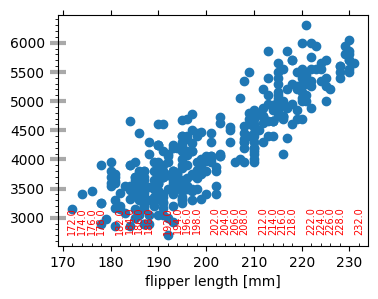

In [13]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);
ax.set_xlabel('flipper length [mm]')

## switch on minor ticks 

# with a shorthand 
ax.minorticks_on() 

# or with a minor locator
# from matplotlib.ticker import AutoMinorLocator # defaults to 4 or 5
# ax.xaxis.set_minor_locator(AutoMinorLocator())


## modify the tick directions and positions 

ax.tick_params(axis='x', which='major', direction="out", bottom=True, top=True) 
ax.tick_params(axis='x', which='minor', bottom=True, direction="in") 
ax.tick_params(axis='y', which='major', direction="inout") 
ax.tick_params(axis='y', which='minor', direction="out") 

## modify the tick line properties (thickness, color, length etc.)
ax.tick_params(axis='y', which='major', width=3, length=12, color="darkgray") 

## modify the tick rotation and formatting 
from matplotlib.ticker import FormatStrFormatter
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax.tick_params(axis='x', which='minor', 
                    labelcolor="red", labelrotation=90, 
                    labelsize=7, pad=-28) 


## Styling axis labels and title

Let's go back to the simple example

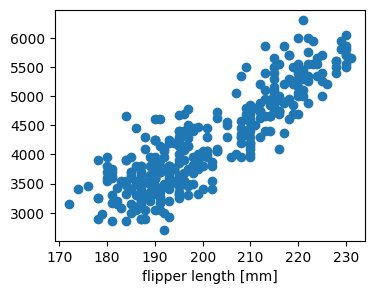

In [14]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);
ax.set_xlabel('flipper length [mm]');

We can add styling and custom position to the x and y labels at the moment of creating the label

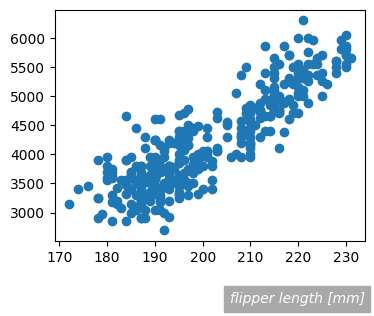

In [15]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);
ax.set_xlabel('flipper length [mm]', 
              labelpad=20, # distance to the axis
              loc='right', # horizontal position 
              color="white", backgroundcolor="darkgray", # colorful 
              fontstyle='italic',); # custom font style 

# instead of loc, we may set parameter x in combination with horizontalalignment (ha) for the relative x position 

Instead of `loc` and `pad`, we can use `x`, `y` for absolute coordinates. We can also change the font 

findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.


findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.


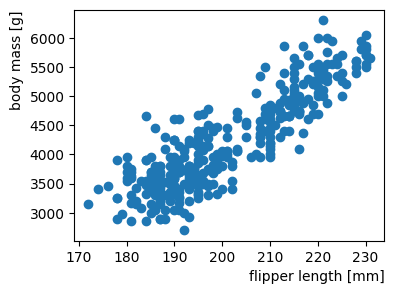

In [16]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);
ax.set_xlabel('flipper length [mm]', x=1, ha='right',
               fontproperties={'family': 'Roboto Condensed', 'size': 10}
              ); 
ax.set_ylabel('body mass [g]', y=1, ha='right',
               fontproperties={'family': 'Roboto Condensed', 'size': 10}
              ); 

The same goes for the title: 

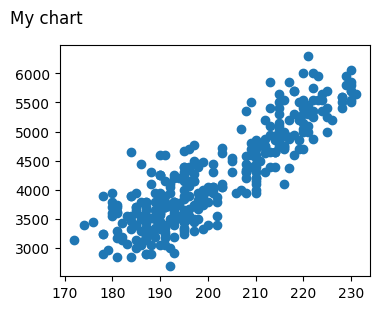

In [23]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);

# using relative coordinates for title positioning: 
# ax.set_title('My chart', pad=20, loc='left',);

# by default, title can be positioned in axes coordinates using x,y 
# ax.set_title('My chart', x=0, y=1, ha='left', va='bottom', );

# making the title centered not according to the axes, but the whole figure? 
# position the title in figure coordinates: attach the title to the center of the figure and hang it from the figure top border
ax.set_title('My chart', x=0, y=1, ha='left', va='top', transform=f.transFigure );

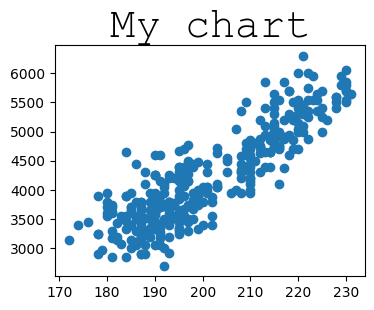

In [18]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);

# using custom font properties for the title: 
ax.set_title('My chart', fontproperties={'family': 'Courier New', 'size': 30});


Note: we can only have one title! 

Note: in general, xlabel, ylabel and title are `text` objects and they accept all the keywords that `text` accepts: https://matplotlib.org/stable/tutorials/text/text_props.html 

We will learn them soon! 

## Styling spines

Spines are the lines that are drawn where the axis are. Spine and axis are two separate objects, so we can have invisible spines, yet still see all the ticks 

We will access the `ax.spines` object, which has properties / keys relating to 4 spines: top, left, bottom, right 

#### switching off the spines

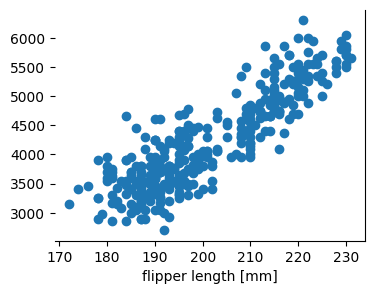

In [19]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);
ax.set_xlabel('flipper length [mm]');

ax.spines.top.set_visible(False) # switching visibility on and off 
ax.spines['left'].set_visible(False) # ticks and spine visibility are independent and we can access the spines as a dict as well 

#### coloring the spines

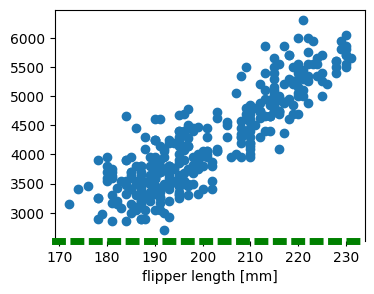

In [20]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);
ax.set_xlabel('flipper length [mm]');

# let's make a customized ugly bottom spine 
ax.spines.bottom.set_color('green')
ax.spines.bottom.set_linewidth(5)
ax.spines.bottom.set_linestyle(':')

#### Cross the spines at an arbitrary location: 

We can make the spines cross at an arbitrary xy location, instead of them framing the plot 

Watch out for the `zorder` - by default the spines will be drawn on top of data 

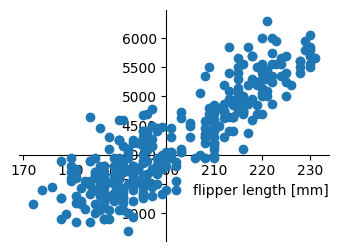

In [21]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g'], 
           zorder=20);
ax.set_xlabel('flipper length [mm]', loc='right');

ax.spines.top.set_visible(False)
ax.spines.bottom.set_position(('data', 4000))

ax.spines.right.set_visible(False)
ax.spines.left.set_position(('data', 200))
